## Librerias

In [1]:
import numpy as np
import sympy as sym
from sympy import symbols
sym.init_printing()

## Problema 1



Considere dos bloques de masa $m_1$ y $m_2$, el bloque $m_1$ empieza con una velocidad $v_1 = - 1 \text{ m/s}$ el bloque $m_2$ empieza en reposo. Primero el bloque 1 choca con el bloque 2 de forma elastica, luego el bloque 2 choca elasticamente contra la pared, y luego se dirige el bloque 2 de nuevo hacia el bloque 1 para chocar de nuevo elasticamente. El bloque 2 choca elasticamente varias veces contra la pared y contra el bloque 1 y se cuentan el número de choques elasticos totales, hasta que los bloques dejan de chocar.

![](https://raw.githubusercontent.com/diegour1/CompMetodosComputacionales/main/DataFiles/image9.png)

Más detalles del problema se pueden encontrar en este [link](https://www.youtube.com/watch?v=HEfHFsfGXjs&ab_channel=3Blue1Brown).



a) Si los bloques 1 y 2 tienen en cierto momento una velocidad $v_{1i}$ y $v_{2i}$ la velocidades después del choque elastico están dadas por, 

$$
v_{1f} = v_{1i}\Big(\frac{m_1-m_2}{m_1+m_2}\Big) + v_{2i}\Big(\frac{2m_2}{m_1+m_2}\Big)
$$

$$
v_{2f} = v_{1i}\Big(\frac{2m_1}{m_1+m_2}\Big) + v_{2i}\Big(\frac{m_2-m_1}{m_1+m_2}\Big)
$$

Demuestre la validez de esas dos ecuaciones con ayuda de la libreria sympy. (Imprima la ecuación simplificada que resulta de simpy)

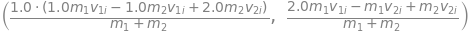

In [2]:

m1 = sym.symbols('m_1')
m2 = sym.symbols('m_2')
v1i = sym.symbols('v_{1i}')
v2i = sym.symbols('v_{2i}')
v1f = sym.symbols('v_{1f}')
v2f = sym.symbols('v_{2f}')

equation_1 = m1*v1i + m2*v2i - m1*v1f - m2*v2f
equation_2 = ((1/2)*m1*(v1i**2)) + ((1/2)*m2*(v2i**2)) - ((1/2)*m1*(v1f**2)) - ((1/2)*m2*(v2f**2))
    
respuesta = sym.solve((equation_1,equation_2),(v1f,v2f))

solucion1 = sym.simplify(respuesta[1][0])
solucion2 = sym.simplify(respuesta[1][1])

solucion1, solucion2


b) Cree la función `num_collisions(m1, m2)` que reciba las masas $m_1$ y $m_2$ de los bloques 1 y 2 respectivamente, y retorne el número de choques totales `count`, la velocidad inicial del bloque 1 es $v_1 = -1 \text{ m/s}$ y el bloque 2 empieza en reposo.

In [3]:

def num_collisions(m1, m2):
    
    count = 0
    v1i = -1
    v2i = 0
    
    while v1i < v2i:
        v1f = ( v1i * ( (m1-m2) / (m1+m2) ) ) + ( v2i * ((2*m2) / (m1+m2) ) )
        v2f = ( v1i * ( (2*m1) / (m1+m2) ) ) + ( v2i * ((m2-m1) / (m1+m2) ) )
        if v2f < 0:
            v2f *= -1
            count += 1
        
        v1i = v1f
        v2i = v2f
        
        count += 1
        
    return count


In [4]:
# codigo para la verificacion no modificar

print(num_collisions(1, 1))
print(num_collisions(10, 1))
print(num_collisions(100, 1))
print(num_collisions(1000, 1))
print(num_collisions(10000, 1))
print(num_collisions(100000, 1))
print(num_collisions(1000000, 1))
print(num_collisions(10000000, 1))
print(num_collisions(100000000, 1))


3
10
31
99
314
993
3141
9934
31415


c)¿ Cómo resolvería el problema analíticamente ? (Sin ver las soluciones en internet) (No hay soluciones correctas)



Primero es se debe asumir dos condiciones, la primera es que no se tiene fricción y es un coche perfectamente elastico por lo que hay conservación tanto de energía como del momento.


Para empezar, cuando un bloque golpea al otro, la velocidad se obtiene usando la conservación de energía y la conservación de momento.

Sean sus masas m1 y m2, y sus velocidades v1 y v2, que serán variables cambiando durante el proceso. En cualquier momento, la energía cinética total es (½)m1(v1)^2 + (½)m2(v2)^2. Incluso si v1 y v2 cambian cuando los bloques rebotan, el valor de la expresión queda constante. El momento total de los dos bloques es m1 * v1 + m2 * v2. Esto también es constante cuando los bloques chocan el uno con el otro, pero puede cambiar si el bloque pequeño choca con la pared. Se debe asumir una pared de masa infinita de modo que una transferencia de momento a la pared no la moverá.

Entonces, tenemos dos ecuaciones y dos incógnitas. Con aa ecuación de energía, se tiene que v1 y v2 cambian, se puede representar esta ecuación en un plano coordenado donde la coordenada x representa v1 y la coordenada y representa v2. Entonces los puntos individuales en el plano representan los pares de velocidades de nuestros bloques.

En este caso, la ecuación de energía representa una elipse donde cada punto en esta elipse nos da un par de velocidades y todos los puntos de esta elipse corresponden a la misma energía cinética total.

Por conveniencia se cambia las coordenadas para hacer esto un círculo perfecto, dado que sabemos que estamos buscando a pi. En vez de usar la coordenada x para representar v1, que sea sqrt(m1) * v1, igualmente, que la coordenada y represente sqrt(m2)v2. De esa forma, cuando veamos la ecuación de conservación de energía, diga ½(x^2 + y^2) = (constante), la cual es la ecuación de una circunferencia. Cuyo circulo depende de la energía total.

En el principio, cuando el primer bloque se desliza hacia la izquierda y el segundo es estacionario estamos en el punto más a la izquierda del círculo, donde la coordenada x es negativa y la coordenada y es 0.

La conservación de energía nos dice que debemos saltar a otro punto en ese círculo, usando la conservación de momento, donde antes y después de la colisión, el valor m1 * v1 + m2 * v2 debe permanecer constante. Con las coordenadas modificadas, eso luce como sqrt(m1) * x + sqrt(m2) * y = (constante), la cual es la ecuación de una recta con pendiente -sqrt(m1/m2). Cuya línea específica depende cuál es esa constante de momento. Pero nosotros sabemos que debe pasar por el primer punto, lo que fija esa línea

Cuando el segundo bloque rebota con la pared, su velocidad es la misma, pero irá de negativa a positiva. En el diagrama esto corresponde a reflejar el circulo a través del eje x, puesto que la coordenada y es multiplicada por -1. Entonces de nuevo, la siguiente colisión corresponde a un salto en la línea de pendiente -sqrt(m1 / m2), puesto que estando en esa línea es como la conservación de momento luce en el siguiente diagrama.


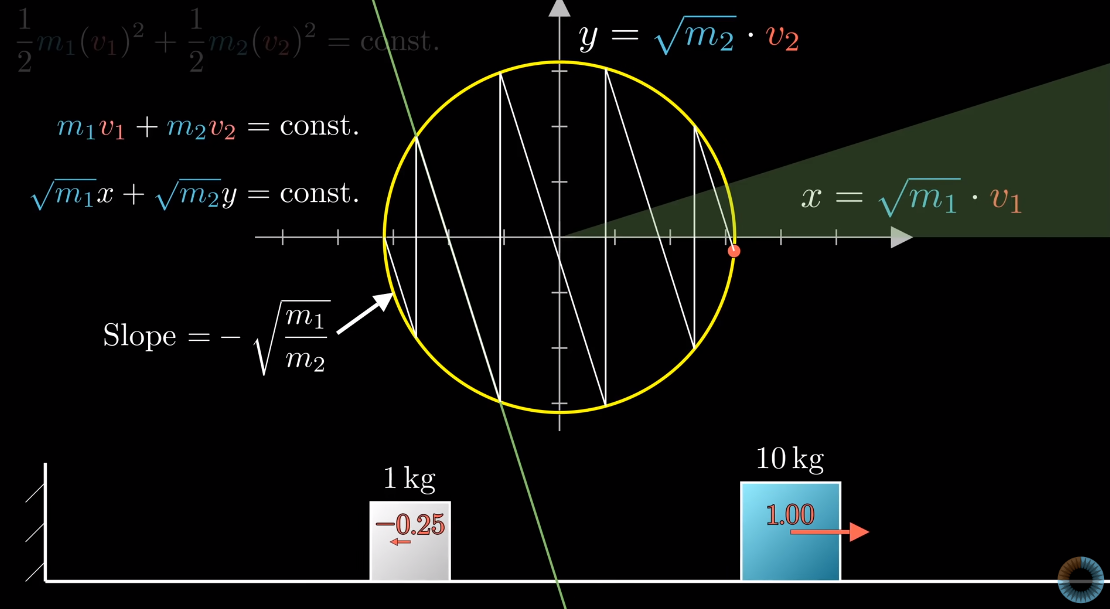

Todas las longitudes de arco entre los puntos del círculo lucen iguales, entonces el hecho de calcular el valor de una longitud de arco, debería ser suficiente para saber cuántas colisiones toma para cubrir el círculo hasta la zona final.

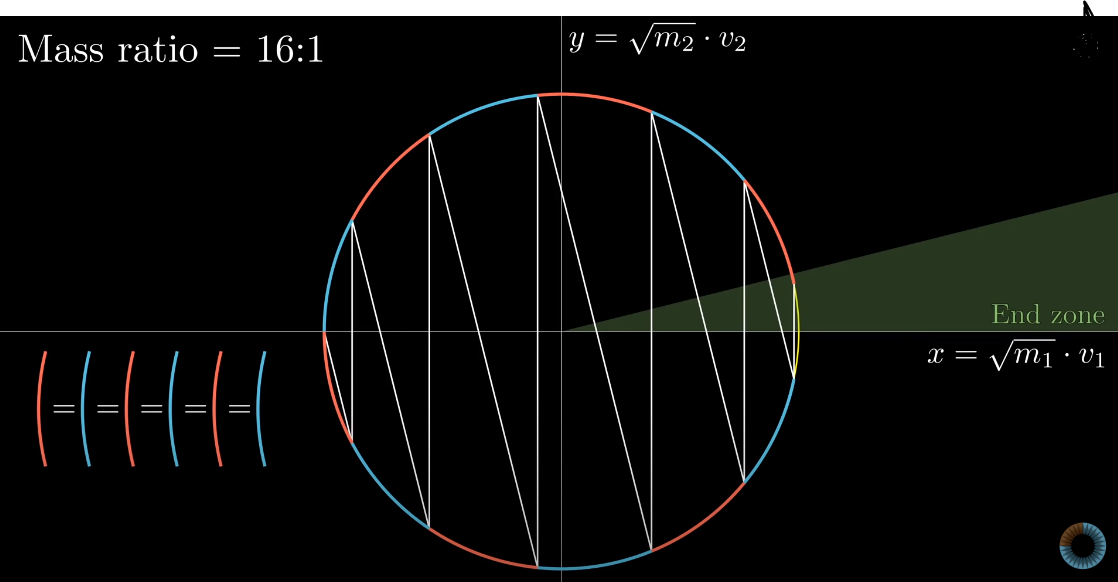